# K Means Clustering

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
sns.set(color_codes=True)
%matplotlib inline

## Import the Dataset

In [2]:
dataset = pd.read_csv(r'C:\Users\moshe\Documents\Mechine Learning\K_Means\Mall_Customers.csv')

In [3]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
dataset.shape

(200, 5)

## Select Variables

In [5]:
X = dataset.iloc[:, [3,4]].values

In [6]:
X[0:5]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]], dtype=int64)

## Find Optimal Number of Clusters

In [7]:
from sklearn.cluster import KMeans

In [8]:
wcss = []

In [9]:
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [10]:
old_slope = 0
diffs = []
for i in range(0,len(wcss)-1):
    slope = (wcss[i+1] - wcss[i])/(i+1-i)
    diff = abs(old_slope - slope)
    old_slope = slope
    diffs.append(diff)
optimal = diffs.index(min(diffs))

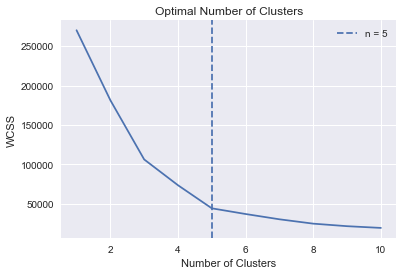

In [11]:
plt.plot(range(1, 11), wcss);
plt.title('Optimal Number of Clusters');
plt.xlabel('Number of Clusters');
plt.ylabel('WCSS');
plt.axvline(x=optimal, linestyle='--', label='n = ' +str(optimal));
plt.legend()

## Fitting the Optimal K Means Algorithm to the Dataset

In [12]:
kmeans = KMeans(n_clusters=optimal, init='k-means++', max_iter=300, n_init=10, random_state=0)

In [13]:
y_kmeans = kmeans.fit_predict(X)

## Visualizing the Clusters

In [14]:
colors = ['red', 'blue', 'green', 'cyan', 'purple']

In [15]:
clients = ['Careful', 'Standard', 'Target', 'Careless', 'Sensible']

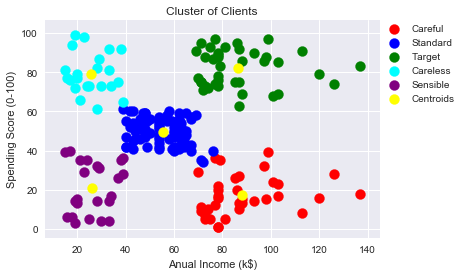

In [16]:
for i in range (0, 5):
    plt.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1], s=100, c = colors[i], label = clients[i]);
    
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c = 'yellow', label='Centroids');
plt.title('Cluster of Clients');
plt.xlabel('Anual Income (k$)');
plt.ylabel('Spending Score (0-100)');
plt.legend(bbox_to_anchor=(1.00, 1), loc=2, borderaxespad=0.);